In [1]:
!pip install -U pandas==1.4.3
!pip install -U lightautoml==0.3.8b1

  Using cached pandas-1.4.3-cp310-cp310-win_amd64.whl (10.5 MB)
  Using cached numpy-2.0.0-cp310-cp310-win_amd64.whl (16.5 MB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)


You should consider upgrading via the 'C:\Users\USER\Desktop\код\dz_shad\docker\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached lightautoml-0.3.8b1-py3-none-any.whl (382 kB)
  Using cached lightgbm-3.2.1-py3-none-win_amd64.whl (1.0 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached torch-2.3.1-cp310-cp310-win_amd64.whl (159.8 MB)
  Using cached catboost-1.2.5-cp310-cp310-win_amd64.whl (101.1 MB)
  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
  Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
  Using cached json2html-1.3.0-py3-none-any.whl
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached scikit_learn-1.5.1-cp310-cp310-win_amd64.whl (11.0 MB)
  Using cached statsmodels-0.14.0-cp310-cp310-win_amd64.whl (9.2 MB)
  Using cached holidays-0.52-py3-none-any.whl (1.0 MB)
  Using cached poetry_core-1.9.0-py3-none-any.whl (309 kB)
  Using cached AutoWoE-1.3.2-py3-none-any.whl (215 kB)
  Using cached PyYAML-6.0.1-cp310-cp310-win_amd64.whl (145 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl (

You should consider upgrading via the 'C:\Users\USER\Desktop\код\dz_shad\docker\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, roc_auc_score
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

'nlp' extra dependecy package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.


c:\Users\USER\Desktop\код\dz_shad\docker\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\USER\Desktop\код\dz_shad\docker\venv\lib\site-packages\lightautoml\ml_algo\dl_model.py:41: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
c:\Users\USER\Desktop\код\dz_shad\docker\venv\lib\site-packages\lightautoml\text\nn_model.py:22: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
c:\Users\USER\Desktop\код\dz_shad\docker\venv\lib\site-packages\lightautoml\text\dl_transformers.py:25: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")


In [3]:
import lightautoml
print(lightautoml.__version__)  

0.3.8b1


In [4]:
N_THREADS = 10
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.25
TIMEOUT = 60 * 60 * 1/3# equal to 15 minutes
TARGET_NAME = 'binary_target'

In [5]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [7]:
train_data = pd.read_csv('train.csv')
print(train_data.shape)
train_data.head()

(1010248, 19)


,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq,binary_target
0,0,Уран,>24LY,14.617797,1.0,27034.974914,71.37,1.000000,NaN,26.0,10.0,NaN,NaN,NaN,False,0.540984,_output-_сеть 500 (условие) 2000f;5d,1.000000,0
1,1,Марс,>24LY,32.686083,3.0,40373.828300,354.27,2.000000,35.679126,45.0,8.0,NaN,NaN,NaN,False,0.573770,тариф_a 250 (условие) _безлим_c_output_сутки,1.414214,0
2,2,Церера,>24LY,25.318570,3.0,32004.378374,139.74,1.414214,NaN,NaN,13.0,NaN,NaN,NaN,False,0.131148,NaN,NaN,0
3,3,Марс,>24LY,70.710678,38.0,59953.505011,1722.65,6.403124,163.309522,203.0,274.0,NaN,NaN,0.031817,False,0.885246,"трафик: 100 (условие) 40mb,_сутки",4.000000,0
4,4,Меркурий,>24LY,9.244999,2.0,21499.998428,28.63,1.414214,5.000000,NaN,NaN,NaN,NaN,NaN,False,0.344262,"трафик: 100 (условие) 40mb,_сутки",1.000000,0


In [8]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)
test_data.head()

(497586, 18)


,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq
0,1010248,Нептун,>24LY,9.244999,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.081967,NaN,NaN
1,1010249,Земля,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.262295,NaN,NaN
2,1010250,Марс,>24LY,18.489997,3.0,30424.692691,114.10,1.732051,1.000000,22.0,13.0,NaN,0.000835,NaN,False,0.934426,_output-_сеть 500 (условие) 2000f;5d,1.000000
3,1010251,NaN,>24LY,39.223207,7.0,44284.990356,512.82,2.645751,7.615773,130.0,123.0,5.0,NaN,NaN,False,0.508197,_output-_сеть 500 (условие) 2000f;5d,2.236068
4,1010252,Сатурн,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.163934,NaN,NaN


In [9]:
submission = pd.read_csv('sample_submission.csv')
print(submission.shape)
submission.head()

(497586, 2)


,client_id,preds
0,1010248,1
1,1010249,1
2,1010250,1
3,1010251,1
4,1010252,1


In [10]:
tr_data, te_data = train_test_split(
    train_data, 
    test_size=TEST_SIZE, 
    stratify=train_data[TARGET_NAME],
    random_state=RANDOM_STATE
)

print(f'Data splitted. Parts sizes: tr_data = {tr_data.shape}, te_data = {te_data.shape}')

tr_data.head()


Data splitted. Parts sizes: tr_data = (757686, 19), te_data = (252562, 19)


,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq,binary_target
862267,862267,Нептун,>24LY,65.208435,39.0,55934.335328,1305.13,6.403124,2.236068,311.0,192.0,22.0,NaN,NaN,False,0.983607,input__ _сеть 200 (условие) _безлим _c_output_...,4.582576,0
367546,367546,Уран,>24LY,19.611731,3.0,34908.828049,197.86,2.000000,NaN,17.0,1.0,NaN,NaN,NaN,False,0.032787,input__-_сеть 500f_fnf;3d,1.414214,1
594510,594510,NaN,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.065574,NaN,NaN,0
416809,416809,NaN,>24LY,24.019159,6.0,36152.857064,227.78,2.828427,NaN,7.0,29.0,20.0,NaN,NaN,False,0.163934,input__ _сеть 200 (условие) _безлим _c_output_...,2.000000,0
232483,232483,Марс,>24LY,12.229881,2.0,24728.406174,50.00,1.732051,NaN,2.0,1.0,NaN,NaN,NaN,False,0.147541,NaN,NaN,0


In [11]:
task = Task('binary', loss = 'logloss', metric = 'auc')
roles = {
    'target': TARGET_NAME,
    'drop': ['ID', 'mrg_']
}

In [12]:
automl = TabularUtilizedAutoML(
    task = task, 
    timeout = TIMEOUT,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
)

In [13]:
oof_pred = automl.fit_predict(tr_data, roles = roles, verbose = 2)

[11:12:44] Start automl utilizator with listed constraints:
[11:12:44] - time: 1200.00 seconds
[11:12:44] - CPU: 4 cores
[11:12:44] - memory: 16 GB

[11:12:44] If one preset completes earlier, next preset configuration will be started

[11:12:44] ==================================================
[11:12:44] Start 0 automl preset configuration:
[11:12:44] c:\Users\USER\Desktop\код\dz_shad\docker\venv\lib\site-packages\lightautoml\automl\presets\tabular_configs\conf_0_sel_type_0.yml, random state: {'reader_params': {'random_state': 42}, 'nn_params': {'random_state': 42}, 'general_params': {'return_all_predictions': False}}
[11:12:44] Stdout logging level is INFO2.
[11:12:44] Task: binary

[11:12:44] Start automl preset with listed constraints:
[11:12:44] - time: 1200.00 seconds
[11:12:44] - CPU: 4 cores
[11:12:44] - memory: 16 GB

[11:12:44] Train data shape: (757686, 19)

[11:13:01] Layer 1 train process start. Time left 1183.76 secs
[11:13:18] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 

In [14]:
import joblib
joblib.dump(automl, 'model.pkl')

['model.pkl']

In [15]:
automl = joblib.load('model.pkl')
y_pred_prob = automl.predict(te_data)
y_pred_prob

array([[0.01127349],
       [0.11378942],
       [0.00716075],
       ...,
       [0.00340085],
       [0.17777318],
       [0.00474549]], dtype=float32)

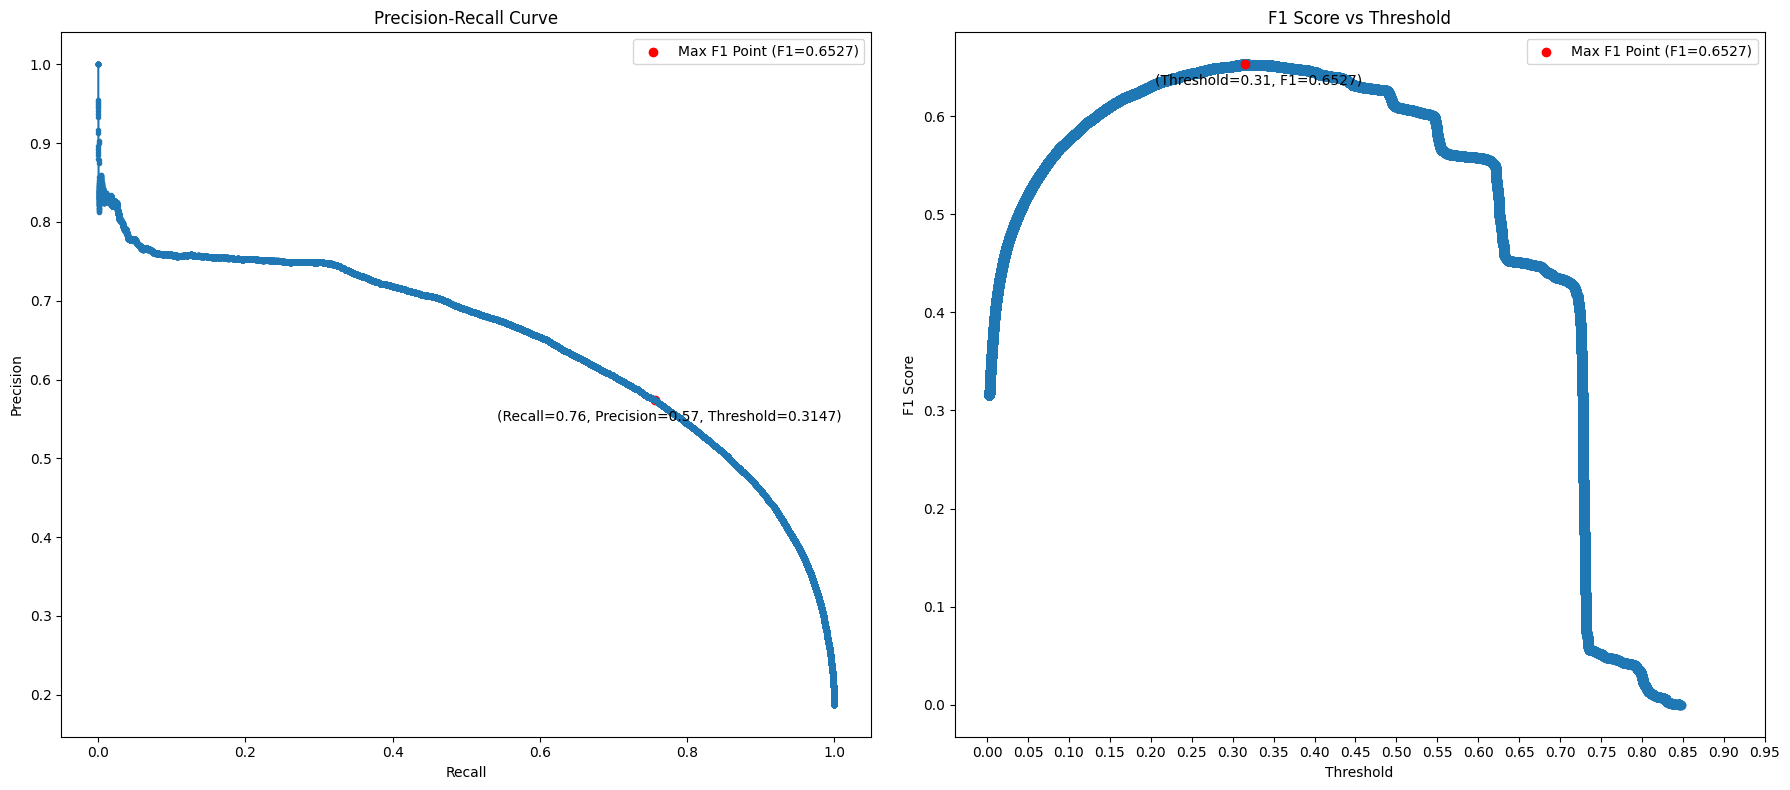

In [16]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

# Вычисление Precision, Recall, F1 Score и thresholds
y_pred_prob =  automl.predict(te_data).data[:, 0]
precision, recall, thresholds = precision_recall_curve(te_data[TARGET_NAME].values, y_pred_prob)
f_score = 2 * precision * recall / (precision + recall)
max_f1_index = np.argmax(f_score)

# Первый график - Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Отображение наилучшей точки F1 Score и ее координат
plt.scatter(recall[max_f1_index], precision[max_f1_index], color='red', label=f'Max F1 Point (F1={f_score[max_f1_index]:.4f})')
plt.annotate(f'(Recall={recall[max_f1_index]:.2f}, Precision={precision[max_f1_index]:.2f}, Threshold={thresholds[max_f1_index]:.4f})',
             (recall[max_f1_index], precision[max_f1_index]),
             textcoords="offset points", xytext=(10,-15), ha='center')
plt.legend()

# Второй график - зависимость F1 Score от порога
plt.subplot(1, 2, 2)
plt.scatter(thresholds, f_score[:-1])
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')

# Отображение наилучшей точки F1 Score и ее координат
plt.scatter(thresholds[max_f1_index], f_score[max_f1_index], color='red', label=f'Max F1 Point (F1={f_score[max_f1_index]:.4f})')
plt.annotate(f'(Threshold={thresholds[max_f1_index]:.2f}, F1={f_score[max_f1_index]:.4f})',
             (thresholds[max_f1_index], f_score[max_f1_index]),
             textcoords="offset points", xytext=(10,-15), ha='center')
plt.legend()
# Установка одинаковго разбиения на оси x
plt.xticks(np.arange(0, 1, 0.05))

plt.tight_layout()
plt.show()


## Training on all data

In [ ]:
automl = TabularUtilizedAutoML(
    task = task, 
    timeout = 60 * 60 * 1/2,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
    general_params = {"use_algos": [["linear_l2", "cb", "lgb_tuned", "cb_tuned", "lgb"], ["rf", "linear_l2"]]}, 
    # ensemble_params={'ensemble_size': 0.5},
    # gpu_ids='0'
    # tuning_params = {"max_tuning_iter": 1000, "max_tuning_time": 60*60*3, "fit_on_holdout": False},
    # configs_list=config
)

In [ ]:
automl.fit_predict(train_data, roles=roles)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 19.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 14.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 18.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      |

array([[0.03317517],
       [0.04253474],
       [       nan],
       ...,
       [       nan],
       [       nan],
       [0.12809867]], dtype=float32)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    4.3s finished


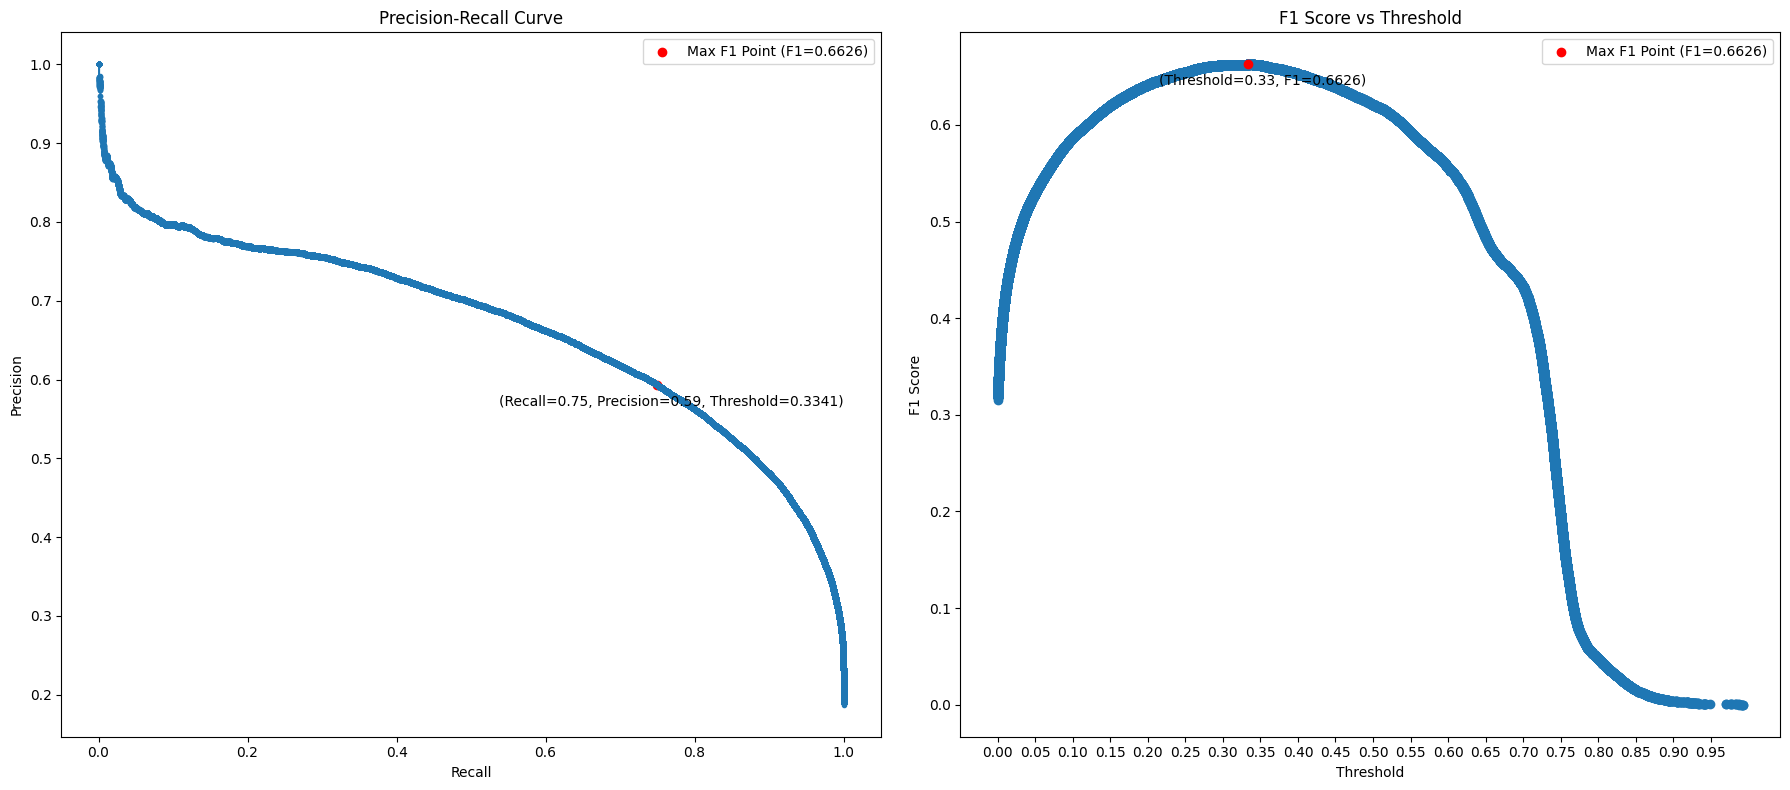

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

# Вычисление Precision, Recall, F1 Score и thresholds
y_pred_prob =  automl.predict(te_data).data[:, 0]
precision, recall, thresholds = precision_recall_curve(te_data[TARGET_NAME].values, y_pred_prob)
f_score = 2 * precision * recall / (precision + recall)
max_f1_index = np.argmax(f_score)

# Первый график - Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Отображение наилучшей точки F1 Score и ее координат
plt.scatter(recall[max_f1_index], precision[max_f1_index], color='red', label=f'Max F1 Point (F1={f_score[max_f1_index]:.4f})')
plt.annotate(f'(Recall={recall[max_f1_index]:.2f}, Precision={precision[max_f1_index]:.2f}, Threshold={thresholds[max_f1_index]:.4f})',
             (recall[max_f1_index], precision[max_f1_index]),
             textcoords="offset points", xytext=(10,-15), ha='center')
plt.legend()

# Второй график - зависимость F1 Score от порога
plt.subplot(1, 2, 2)
plt.scatter(thresholds, f_score[:-1])
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')

# Отображение наилучшей точки F1 Score и ее координат
plt.scatter(thresholds[max_f1_index], f_score[max_f1_index], color='red', label=f'Max F1 Point (F1={f_score[max_f1_index]:.4f})')
plt.annotate(f'(Threshold={thresholds[max_f1_index]:.2f}, F1={f_score[max_f1_index]:.4f})',
             (thresholds[max_f1_index], f_score[max_f1_index]),
             textcoords="offset points", xytext=(10,-15), ha='center')
plt.legend()
# Установка одинаковго разбиения на оси x
plt.xticks(np.arange(0, 1, 0.05))

plt.tight_layout()
plt.show()


In [ ]:
submission

,client_id,preds
0,1010248,1
1,1010249,1
2,1010250,1
3,1010251,1
4,1010252,1
...,...,...
497581,1507829,1
497582,1507830,1
497583,1507831,1
497584,1507832,1


In [ ]:
test_data

,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq
0,1010248,Нептун,>24LY,9.244999,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.081967,NaN,NaN
1,1010249,Земля,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.262295,NaN,NaN
2,1010250,Марс,>24LY,18.489997,3.0,30424.692691,114.10,1.732051,1.000000,22.0,13.0,NaN,0.000835,NaN,False,0.934426,_output-_сеть 500 (условие) 2000f;5d,1.000000
3,1010251,NaN,>24LY,39.223207,7.0,44284.990356,512.82,2.645751,7.615773,130.0,123.0,5.0,NaN,NaN,False,0.508197,_output-_сеть 500 (условие) 2000f;5d,2.236068
4,1010252,Сатурн,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.163934,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497581,1507829,Марс,>24LY,54.694150,14.0,52294.430677,997.01,3.741657,NaN,147.0,207.0,36.0,NaN,NaN,False,1.000000,тариф_a:500 (условие) 2500f input__ _сеть _250...,3.741657
497582,1507830,Марс,>24LY,9.244999,1.0,14723.954424,6.41,1.414214,NaN,266.0,24.0,NaN,NaN,NaN,False,0.721311,NaN,NaN
497583,1507831,NaN,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.016393,NaN,NaN
497584,1507832,Марс,>24LY,28.867456,5.0,37991.746291,277.78,2.236068,0.000000,23.0,30.0,NaN,NaN,NaN,False,0.459016,_output-_сеть 500f =2000f__output_сеть__безлим,1.414214


In [ ]:
submission["preds"] = (automl.predict(test_data).data[:, 0] >= 0.3175).astype("int")

submission.to_csv('submit_3_lightautoml_rf_linear_3175treshold_3600.csv', index = False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    9.9s finished
